Perform an EDA on the dataset.

See what a positive, negative, and neutral review looks like

Check the class count for each class. It’s a class imbalance problem.

Convert the reviews in Tf-Idf score.

Run multinomial Naive Bayes classifier. Everything will be classified as positive because of the class imbalance.

In [4]:
#import the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# read the dataset
data=pd.read_csv('train_data.csv')
test=pd.read_csv('test_data.csv')
test_pred=pd.read_csv('test_data_hidden.csv')
print('done')

done


In [6]:
data.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,Neutral
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and ...",Greattttttt,Positive
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive


In [15]:
data.shape

(4000, 8)

In [7]:
#extract pos, neg & neutral
data['sentiment'].value_counts()

sentiment
Positive    3749
Neutral      158
Negative      93
Name: count, dtype: int64

In [19]:
#keeep only those features that we need for further processing
data1 = data[['sentiment','reviews.text']]

In [20]:
data1.head()

,sentiment,reviews.text
0,Positive,Purchased on Black FridayPros - Great Price (e...
1,Positive,I purchased two Amazon in Echo Plus and two do...
2,Neutral,Just an average Alexa option. Does show a few ...
3,Positive,"very good product. Exactly what I wanted, and ..."
4,Positive,This is the 3rd one I've purchased. I've bough...


In [22]:
data1.shape

(4000, 2)

In [24]:
data1.tail()

,sentiment,reviews.text
3995,Positive,"It‚Äôs fun for the family to play with, but it..."
3996,Positive,"I love the Kindle, it is a great product. It r..."
3997,Positive,I was looking for a blutooth speaker to use wi...
3998,Positive,This is the second Amazon Fire 7 tablet I have...
3999,Positive,"very satisfied with tablet, very fast and effi..."


In [23]:
#create prepocessing the text - normalize, stopwords,lemmatilization..
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Tajudeen\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tajudeen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
wordnet_lemm=WordNetLemmatizer()
tokenizer=RegexpTokenizer(r'[a-z]+')
stop_words=set(stopwords.words('english'))

In [28]:
def preprocess(document):
    document=document.lower()
    words=tokenizer.tokenize(document)
    words=[w for w in words if w not in stop_words]
    #lemmatization
    for pos in [wordnet.NOUN,wordnet.VERB,wordnet.ADJ,wordnet.ADV]:
        words=[wordnet_lemm.lemmatize(x,pos) for x in words]
    return " ".join(words)
print('done')

done


In [29]:
data1['Processed_review']=data1['reviews.text'].apply(preprocess)

C:\Users\Tajudeen\AppData\Local\Temp\ipykernel_19332\1331136844.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Processed_review']=data1['reviews.text'].apply(preprocess)


In [30]:
data1.head()

,sentiment,reviews.text,Processed_review
0,Positive,Purchased on Black FridayPros - Great Price (e...,purchase black fridaypros great price even sal...
1,Positive,I purchased two Amazon in Echo Plus and two do...,purchase two amazon echo plus two dot plus fou...
2,Neutral,Just an average Alexa option. Does show a few ...,average alexa option show thing screen still l...
3,Positive,"very good product. Exactly what I wanted, and ...",good product exactly want good price
4,Positive,This is the 3rd one I've purchased. I've bough...,rd one purchase buy one niece case compare one...


In [33]:
data2=data1[['sentiment','Processed_review']]

In [34]:
data2.head()

,sentiment,Processed_review
0,Positive,purchase black fridaypros great price even sal...
1,Positive,purchase two amazon echo plus two dot plus fou...
2,Neutral,average alexa option show thing screen still l...
3,Positive,good product exactly want good price
4,Positive,rd one purchase buy one niece case compare one...


In [35]:
#tf-idf score
from sklearn.feature_extraction.text import CountVectorizer
bow=CountVectorizer().fit(data2['Processed_review'])

In [36]:
len(bow.vocabulary_)

3397

In [37]:
reviews_bow=bow.transform(data2['Processed_review'])

In [38]:
type(reviews_bow)

scipy.sparse._csr.csr_matrix

In [39]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidfData=TfidfTransformer().fit(reviews_bow)
tfidfDataFinal=tfidfData.transform(reviews_bow)

In [40]:
tfidfDataFinal.shape

(4000, 3397)

In [41]:
# implement Naive bayes classifier
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB().fit(tfidfDataFinal,data2['sentiment'])

In [42]:
inputdata='very bad dont like it all worst'

In [43]:
l1=preprocess(inputdata)
l2=bow.transform([l1])
l3=tfidfData.transform(l2)
prediction=model.predict(l3[0])

In [44]:
prediction

array(['Positive'], dtype='<U8')

<Axes: xlabel='sentiment'>

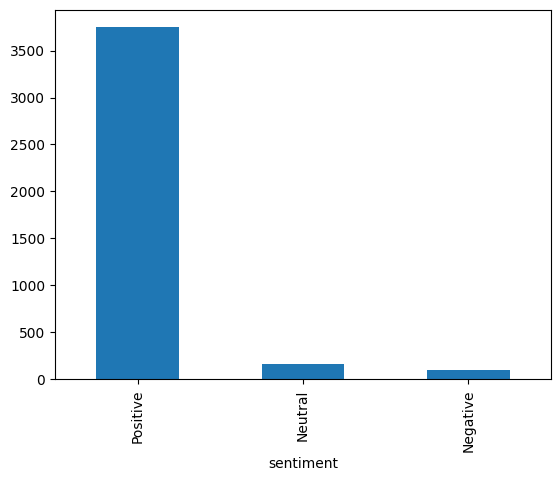

In [46]:
data1['sentiment'].value_counts().plot(kind='bar')

Tackling Class Imbalance Problem:

Oversampling or undersampling can be used to tackle the class imbalance problem. 

In case of class imbalance criteria, use the following metrices for evaluating model performance: precision, recall, F1-score, AUC-ROC curve. Use F1-Score as the evaluation criteria for this project.

Use Tree-based classifiers like Random Forest and XGBoost.

In [47]:
#Handle the class imbalance problem
#partition the data into X & y
X=data2[['Processed_review']]
y =data2['sentiment']

In [48]:
X.shape

(4000, 1)

In [49]:
type(X)

pandas.core.frame.DataFrame

In [56]:
#Apply RandomOverSampler
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=0)
X_res,y_res=ros.fit_resample(X,y)

In [57]:
y_res

0        Positive
1        Positive
2         Neutral
3        Positive
4        Positive
           ...   
11242     Neutral
11243     Neutral
11244     Neutral
11245     Neutral
11246     Neutral
Name: sentiment, Length: 11247, dtype: object

In [58]:
type(X_res)

pandas.core.frame.DataFrame

In [59]:
Y1=pd.DataFrame(y_res,columns=['sentiment'])

In [60]:
# concat both dataframes
final_data=pd.concat([X_res,Y1], axis=1)

In [61]:
final_data.head()

,Processed_review,sentiment
0,purchase black fridaypros great price even sal...,Positive
1,purchase two amazon echo plus two dot plus fou...,Positive
2,average alexa option show thing screen still l...,Neutral
3,good product exactly want good price,Positive
4,rd one purchase buy one niece case compare one...,Positive


In [66]:
final_data.shape

(11247, 2)

In [67]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11247 entries, 0 to 11246
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Processed_review  11247 non-null  object
 1   sentiment         11247 non-null  object
dtypes: object(2)
memory usage: 175.9+ KB


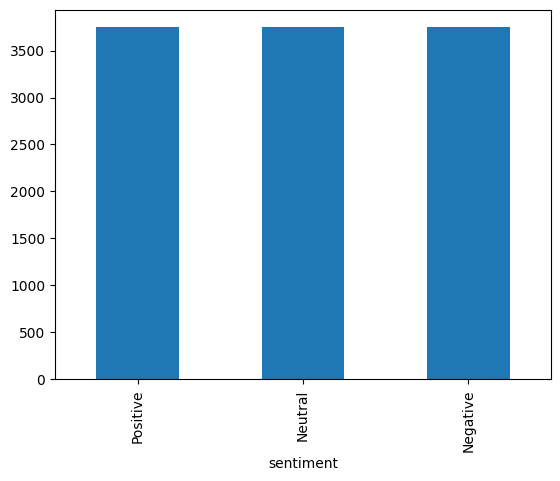

In [63]:
final_data['sentiment'].value_counts().plot(kind='bar')
plt.show()

In [64]:
#create train set & test set
# create train set & test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(final_data['Processed_review'],final_data['sentiment'],test_size=0.2,random_state=0)

In [68]:
# shape of training Data
X_train.shape

(8997,)

In [69]:
X_train[0]

'purchase black fridaypros great price even sale powerful fast quad core processor amaze soundwell builtcons amazon ad amazon need subsidize tablet remove add pay inability access apps except one amazon way able accomplish add google play storenet great tablet money'

In [70]:
y_train.shape

(8997,)